In [ ]:
 # importa libraries necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Autenticação para acesso aos dados
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download dos dados para esta máquina virtual
downloaded = drive.CreateFile({'id': '1_gcRjoTtl9N9x5NXJgFy3fxehhVU-LfB'})
downloaded.GetContentFile('data.csv')

In [ ]:
# Carregando os dados baixados no dataframe 
df = pd.read_csv('data.csv')

In [ ]:
x = df[["vlr_credito","vlr_saldo","num_atend_atrs","vlr_score","num_produtos","num_atend","qtd_oper","qtd_reclm","qtd_restr","cod_rating", "anomes"]]
y = pd.DataFrame(df["ind_engaj"])


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=1)

In [ ]:
X_train

,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,cod_rating,anomes
7377934,2819.37,2035.20,0.0,208.0,1.0,0.0,4.0,0.0,2.0,4,8
7868887,31500.86,1601.98,0.0,454.0,1.0,0.0,12.0,0.0,1.0,8,9
6408396,25516.59,6660.32,0.0,859.0,2.0,0.0,10.0,0.0,0.0,8,7
1481144,4654.28,5901.28,0.0,550.0,1.0,0.0,6.0,0.0,0.0,8,2
5724597,26850.83,1752.12,0.0,689.0,1.0,0.0,19.0,0.0,0.0,8,7
...,...,...,...,...,...,...,...,...,...,...,...
12017146,48018.60,2197.81,0.0,477.0,1.0,0.0,15.0,1.0,1.0,8,13
3876864,104396.76,3134.78,0.0,471.0,1.0,0.0,26.0,0.0,0.0,8,4
4575101,144868.30,2499.66,0.0,464.0,2.0,0.0,48.0,0.0,0.0,8,5
1045476,11098.83,2970.07,0.0,426.0,3.0,0.0,36.0,0.0,1.0,7,2


In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

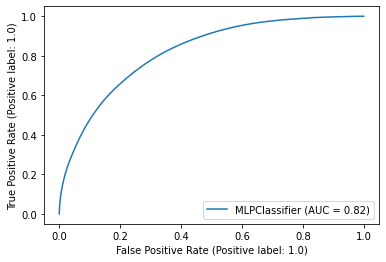

In [ ]:
from sklearn.metrics import plot_confusion_matrix,recall_score,precision_score,plot_roc_curve
y_pred = mlp.predict(X_test)

recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

f1 = 2*precision*recall/(precision+recall)


plot_roc_curve(mlp, X_test, y_test) 

In [8]:
print(recall)
print(precision)
print(f1)

0.5634820960540824
0.7185216122200802
0.6316269781449729


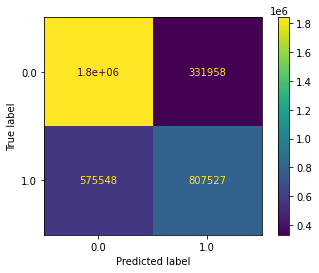

In [ ]:
plot_confusion_matrix(mlp, X_test, y_test)